# Petfinder API
We found our dog Emmy (a mixed breed herding dog named after the German mathematician Emmy Noether) on petfinder.com.
They also provide an API, which let's you access their data in your own applications, and here on Jupyter.

<b>New packages:</b> urllib2 (for making http requests), urlparse, and json (for parsing json strings).

In [292]:
from urllib2 import Request, urlopen, HTTPError
from urlparse import urlunparse, urlparse
import json 
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Let's get the dog breeds from petfinder.  The breed_uri variable specifies my key (you will need your own), the method that I want to use, breed.list, the species, and the format of the output (JSON).  This format is specific to the petfinder api (<a href="https://www.petfinder.com/developers/api-docs">you can look at the documentation</a>).

In [293]:
breed_uri = "http://api.petfinder.com/breed.list?key={}&animal=dog&format=json".format(key)
request = Request(breed_uri)
response = urlopen(request)
rr = response.read()

The output is a JSON object, which is really just dictionaries and lists.  So, it will be a dictionary that could have values as dictionaries or lists.  These lists can then have dictionaries as elements, and so on.  Turtles all the way down.

In [294]:
print type(rr)
print rr[0:400]+'...'

<type 'str'>
{"@encoding":"iso-8859-1","@version":"1.0","petfinder":{"@xmlns:xsi":"http://www.w3.org/2001/XMLSchema-instance","breeds":{"breed":[{"$t":"Affenpinscher"},{"$t":"Afghan Hound"},{"$t":"Airedale Terrier"},{"$t":"Akbash"},{"$t":"Akita"},{"$t":"Alaskan Malamute"},{"$t":"American Bulldog"},{"$t":"American Eskimo Dog"},{"$t":"American Hairless Terrier"},{"$t":"American Staffordshire Terrier"},{"$t":"Ame...


In [295]:
js = json.loads(rr) #Convert from str into json object
print type(js)
js.keys()

<type 'dict'>


[u'petfinder', u'@version', u'@encoding']

In [296]:
js[u'petfinder'].keys()

[u'header', u'@xmlns:xsi', u'@xsi:noNamespaceSchemaLocation', u'breeds']

In [297]:
js[u'petfinder'][u'breeds']

{u'@animal': u'dog',
 u'breed': [{u'$t': u'Affenpinscher'},
  {u'$t': u'Afghan Hound'},
  {u'$t': u'Airedale Terrier'},
  {u'$t': u'Akbash'},
  {u'$t': u'Akita'},
  {u'$t': u'Alaskan Malamute'},
  {u'$t': u'American Bulldog'},
  {u'$t': u'American Eskimo Dog'},
  {u'$t': u'American Hairless Terrier'},
  {u'$t': u'American Staffordshire Terrier'},
  {u'$t': u'American Water Spaniel'},
  {u'$t': u'Anatolian Shepherd'},
  {u'$t': u'Appenzell Mountain Dog'},
  {u'$t': u'Australian Cattle Dog (Blue Heeler)'},
  {u'$t': u'Australian Kelpie'},
  {u'$t': u'Australian Shepherd'},
  {u'$t': u'Australian Terrier'},
  {u'$t': u'Basenji'},
  {u'$t': u'Basset Hound'},
  {u'$t': u'Beagle'},
  {u'$t': u'Bearded Collie'},
  {u'$t': u'Beauceron'},
  {u'$t': u'Bedlington Terrier'},
  {u'$t': u'Belgian Shepherd Dog Sheepdog'},
  {u'$t': u'Belgian Shepherd Laekenois'},
  {u'$t': u'Belgian Shepherd Malinois'},
  {u'$t': u'Belgian Shepherd Tervuren'},
  {u'$t': u'Bernese Mountain Dog'},
  {u'$t': u'Bichon Fr

In [298]:
breeds = [b[u'$t'] for b in js['petfinder']['breeds']['breed']]

In [299]:
print ", ".join(breeds)

Affenpinscher, Afghan Hound, Airedale Terrier, Akbash, Akita, Alaskan Malamute, American Bulldog, American Eskimo Dog, American Hairless Terrier, American Staffordshire Terrier, American Water Spaniel, Anatolian Shepherd, Appenzell Mountain Dog, Australian Cattle Dog (Blue Heeler), Australian Kelpie, Australian Shepherd, Australian Terrier, Basenji, Basset Hound, Beagle, Bearded Collie, Beauceron, Bedlington Terrier, Belgian Shepherd Dog Sheepdog, Belgian Shepherd Laekenois, Belgian Shepherd Malinois, Belgian Shepherd Tervuren, Bernese Mountain Dog, Bichon Frise, Black and Tan Coonhound, Black Labrador Retriever, Black Mouth Cur, Black Russian Terrier, Bloodhound, Blue Lacy, Bluetick Coonhound, Boerboel, Bolognese, Border Collie, Border Terrier, Borzoi, Boston Terrier, Bouvier des Flanders, Boxer, Boykin Spaniel, Briard, Brittany Spaniel, Brussels Griffon, Bull Terrier, Bullmastiff, Cairn Terrier, Canaan Dog, Cane Corso Mastiff, Carolina Dog, Catahoula Leopard Dog, Cattle Dog, Caucasia

Petfinder also provides the pet.getRandom method that let's you get a random animal of a specified species.

In [309]:
pet_url_ex = "http://api.petfinder.com/pet.getRandom?key={}&animal=dog&format=json&output=basic".format(key)
request = Request(pet_url_ex)
response = urlopen(request)
js = json.loads(response.read())

In [310]:
js

{u'@encoding': u'iso-8859-1',
 u'@version': u'1.0',
 u'petfinder': {u'@xmlns:xsi': u'http://www.w3.org/2001/XMLSchema-instance',
  u'@xsi:noNamespaceSchemaLocation': u'http://api.petfinder.com/schemas/0.9/petfinder.xsd',
  u'header': {u'status': {u'code': {u'$t': u'100'}, u'message': {}},
   u'timestamp': {u'$t': u'2017-02-06T07:35:24Z'},
   u'version': {u'$t': u'0.1'}},
  u'pet': {u'age': {u'$t': u'Adult'},
   u'animal': {u'$t': u'Dog'},
   u'breeds': {u'breed': [{u'$t': u'Cattle Dog'},
     {u'$t': u'Catahoula Leopard Dog'}]},
   u'contact': {u'address1': {u'$t': u'107 E. Perkins'},
    u'address2': {},
    u'city': {u'$t': u'Mount Vernon'},
    u'email': {u'$t': u'jeffcoac@att.net'},
    u'fax': {u'$t': u'618-242-2141'},
    u'phone': {u'$t': u'618-244-8024  '},
    u'state': {u'$t': u'IL'},
    u'zip': {u'$t': u'62864'}},
   u'description': {u'$t': u'We are receiving many dogs and puppies daily and each animal here will have a VERY LIMITED TIME. Please do not wait to contact us abo

# Streamlining requests
The urlparse method will parse the url into an immutable tuple that you need to convert to a list to edit.  Let's create the pet_url method that that will expedite the process of creating a url string by specifying the petfinder arguments.

In [305]:
url_ex = "http://api.petfinder.com/pet.getRandom?key={}&animal=dog&format=json&output=basic"
urll = list(urlparse(url_ex))
print urll

['http', 'api.petfinder.com', '/pet.getRandom', '', 'key={}&animal=dog&format=json&output=basic', '']


In [306]:
def pet_url(key,method="pet.getRandom",animal="dog",
              form="json",output="basic"):
    """
    Input: api key and parameters for the query
    Output: a url string
    """
    urll = list(urlparse("http://api.petfinder.com/"))
    params = "key={}&animal={}&format={}&output={}".format(key,animal,form,output)
    urll[2] = method
    urll[4] = params
    return urlunparse(urll)

In [308]:
pet_url('12345',method="breeds.list")

'http://api.petfinder.com/breeds.list?key=12345&animal=dog&format=json&output=basic'

In [311]:
def print_pet(js):
    """
    Input: Petfinder JSON object from getRandom method
    Output: String describing the pet
    """
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'].encode('utf-8') for a in breed_obj]
        breed = ", ".join(breeds) + " mix"
    else:
        breed = breed_obj[u'$t'].encode('utf-8')
    name = js[u'petfinder'][u'pet'][u'name'][u'$t'].encode('utf-8')
    desc = js[u'petfinder'][u'pet'][u'description'][u'$t'].encode('utf-8')
    return "{} is a {}. {}".format(name,breed,desc)

In [312]:
print print_pet(js)

Lad is a Cattle Dog, Catahoula Leopard Dog mix. We are receiving many dogs and puppies daily and each animal here will have a VERY LIMITED TIME. Please do not wait to contact us about any of these nice animals. If you are wanting a WEEKEND OR EVENING responses please email: jeffcoac@att.net  adoption Fee: $60.00 - fully refunded to you once you neuter, rabie, and microchip. Adoption Hours: Mon-Fri 10:30A-4:45P Phone Hours: Mon-Fri 8:30A-4:45P (618)244-8024 Ask for Martin
Now you can find us on face book @ jefferson county animal control


Let's try to get at the image links for this dog.

In [107]:
image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
image_recs

[{u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=60&-pnt.jpg',
  u'@id': u'1',
  u'@size': u'pnt'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=95&-fpm.jpg',
  u'@id': u'1',
  u'@size': u'fpm'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=500&-x.jpg',
  u'@id': u'1',
  u'@size': u'x'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=300&-pn.jpg',
  u'@id': u'1',
  u'@size': u'pn'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/1/?bust=1483818088&width=50&-t.jpg',
  u'@id': u'1',
  u'@size': u't'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/2/?bust=1483818088&width=60&-pnt.jpg',
  u'@id': u'2',
  u'@size': u'pnt'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139683/2/?bust=1483818088&width=95&-fpm.jpg',
  u'@id': u'2',
  u'@size': u'fpm'},
 {u'$t': u'http://photos.petfinder.com/photos/pets/37139

In [285]:
def display_pet(js):
    """
    Input: petfinder json object
    Output: html string with image
    """
    from IPython.display import HTML
    try:
        image_recs = js[u'petfinder'][u'pet'][u'media'][u'photos'][u'photo']
    except KeyError:
        return ""
    for rec in image_recs:
        image_uri = rec['$t']
        if rec['@size'] == u'x':
            break
    return "<center><img src='{}'></center>".format(image_uri)

In [313]:
HTML(display_pet(js) + print_pet(js)) 
#Both functions return html strings and HTML will display that

Let's make it easy to get a random dog, since we'll be doing it many times.

In [315]:
print pet_url.__doc__


    Input: api key and parameters for the query
    Output: a url string
    


In [316]:
def random_dog(key):
    """
    Input: api key
    Output: HTML description of the dog
    """
    pet_url_rand = pet_url(key)
    request = Request(pet_url_rand)
    response = urlopen(request)
    js = json.loads(response.read())
    return HTML(display_pet(js) + print_pet(js))

In [321]:
try:
    display(random_dog(key))
except KeyError:
    print "Poor format from petfinder."

# Breed Statistics

Let's do some statistics.  We have a way of getting a random dog, so we can obtain a sample.  I'm interested in the breed distribution for example.

In [323]:
from collections import Counter

def random_dog_breed(key):
    """
    Get a random dog and return the breed
    Input: api key
    Output: counter object of dog breeds
    """
    pet_uri = "http://api.petfinder.com/pet.getRandom?key={}&animal=dog&format=json&output=full".format(key)
    request = Request(pet_uri)
    response = urlopen(request)
    js = json.loads(response.read())
    breed_obj = js[u'petfinder'][u'pet'][u'breeds'][u'breed']
    if type(breed_obj) == list:
        breeds = [a[u'$t'] for a in breed_obj]
        breed_counter = Counter({b:1 for b in breeds})
    else:
        breed_counter = Counter({breed_obj[u'$t']: 1})
    return breed_counter

In [161]:
tsize = 500
Breed_dist = sum((random_dog_breed(key) for i in xrange(tsize)),Counter())

In [324]:
common_breeds = Breed_dist.most_common(10)

In [325]:
common_breeds

[(u'Pit Bull Terrier', 76),
 (u'Labrador Retriever', 68),
 (u'Chihuahua', 48),
 (u'Terrier', 45),
 (u'Mixed Breed', 34),
 (u'Boxer', 31),
 (u'German Shepherd Dog', 23),
 (u'Beagle', 22),
 (u'Hound', 21),
 (u'American Staffordshire Terrier', 21)]

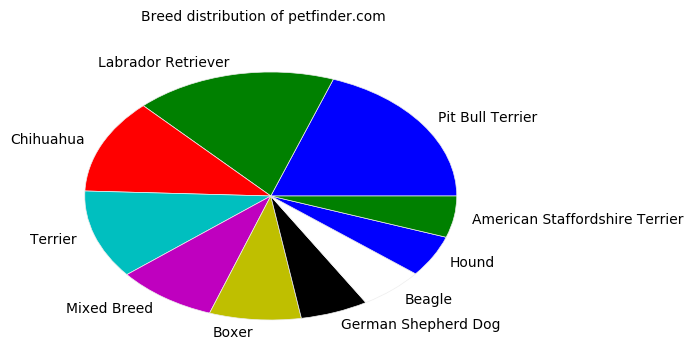

In [326]:
_ = plt.pie([c[1] for c in common_breeds],labels=[c[0].encode('utf-8') for c in common_breeds])
_ = plt.suptitle('Breed distribution of petfinder.com')